# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
'''from google.colab import drive
drive.mount('/content/drive') '''

"from google.colab import drive\ndrive.mount('/content/drive') "

In [3]:
df = pd.read_csv('/Users/jaehyunoh/Desktop/YBIGTA/0713 EDA-FE/airbnb_listings.csv', index_col=0)

/var/folders/st/lt0zbs2n4ng04zk_hnpqlt380000gn/T/ipykernel_96373/1816679608.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jaehyunoh/Desktop/YBIGTA/0713 EDA-FE/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [6]:
#결측치의 수
missing_num=df.isnull().sum()
missing_percent=(df.isnull().sum() / len(df) *100).round(2)

In [7]:
#Q2
#결측치의 수
df_miss = pd.DataFrame({'missing':missing_num,'missing %' :missing_percent})

In [8]:
df_miss=df_miss.sort_values(by='missing', ascending=False)
miss_index = df_miss[df_miss['missing']==0]
df_miss.drop(miss_index.index, inplace=True)

In [9]:
df_miss

,missing,missing %
jurisdiction_names,50781,99.97
license,50759,99.93
square_feet,50407,99.23
monthly_price,46119,90.79
weekly_price,45411,89.40
host_response_time,19006,37.42
host_response_rate,19006,37.42
security_deposit,17325,34.11
host_acceptance_rate,14015,27.59
review_scores_value,11482,22.60


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

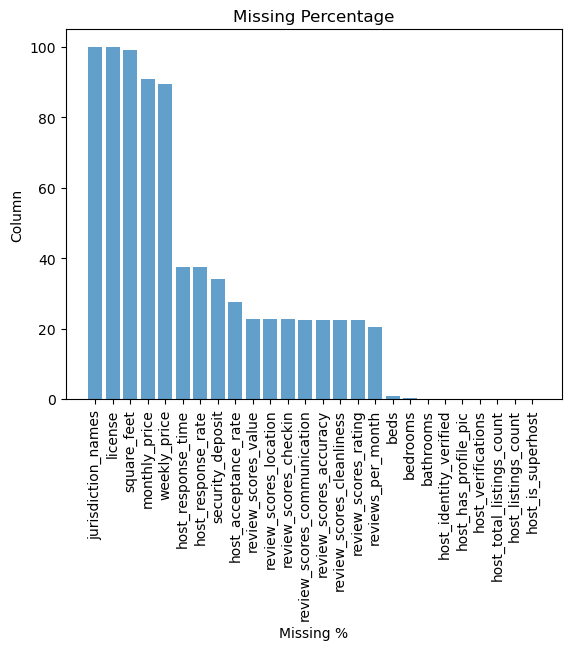

In [10]:
# Q3
# 'missing %' 열을 기준으로 내림차순 정렬
df_miss = df_miss.sort_values('missing %', ascending=False)

# 막대 그래프 그리기
plt.bar(df_miss.index, df_miss['missing %'], align='center', alpha=0.7)
plt.title('Missing Percentage')
plt.xlabel('Missing %')
plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.ylabel('Column')

# 그래프 출력
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [11]:
# Q4
df[df['beds'].isnull()].head()


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [12]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [13]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

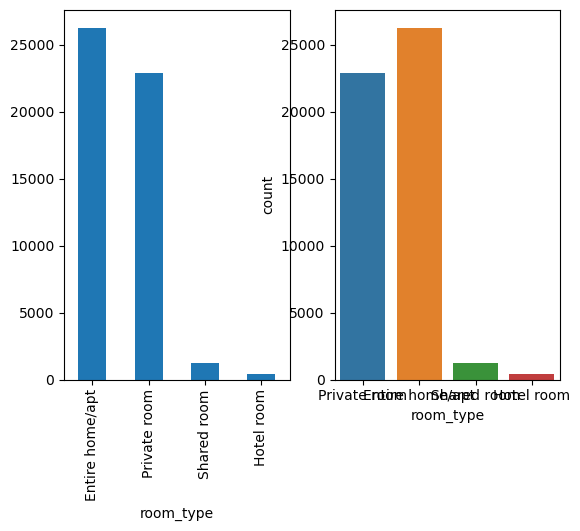

In [15]:
# Q5
# 숫자로도 파악할 수 있지만, 그래프로 보면 더 직관적이에요
f,ax = plt.subplots(1,2)
df["room_type"].value_counts().plot(kind = "bar", ax = ax[0]) #bar plot
sns.countplot(x = "room_type", data = df, ax = ax[1]) #count plot

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: xlabel='room_type', ylabel='count'>

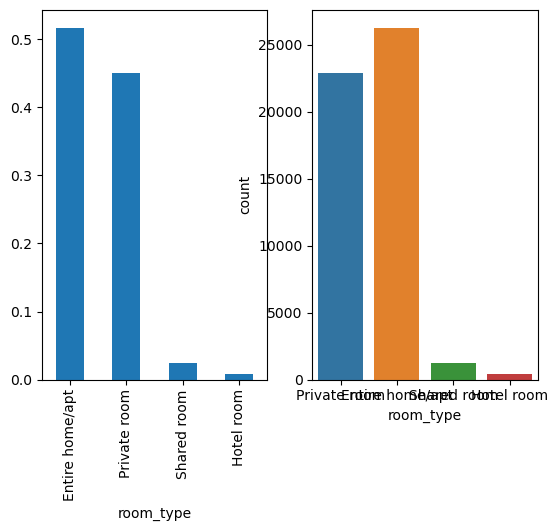

In [16]:
# Q6
f,ax = plt.subplots(1,2)
(df["room_type"].value_counts()/len(df)).plot(kind = "bar", ax = ax[0]) #bar plot
sns.countplot(x = "room_type", data = df, ax = ax[1]) #count plot

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

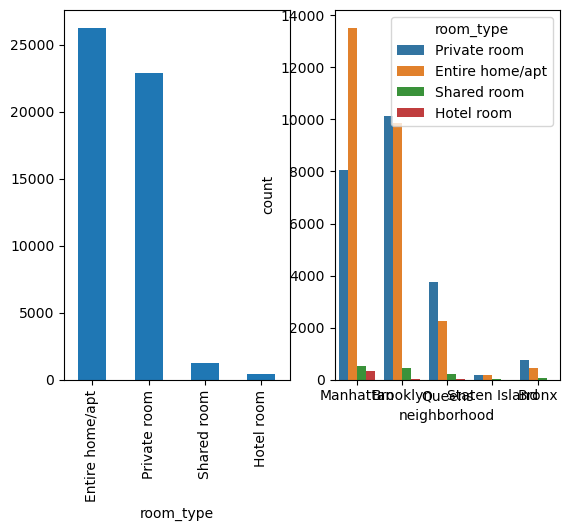

In [17]:
# Q7
f,ax = plt.subplots(1,2)
df["room_type"].value_counts().plot(kind = "bar", ax = ax[0]) #bar plot
sns.countplot(x = "neighborhood", hue="room_type", data = df, ax = ax[1]) #count plot

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

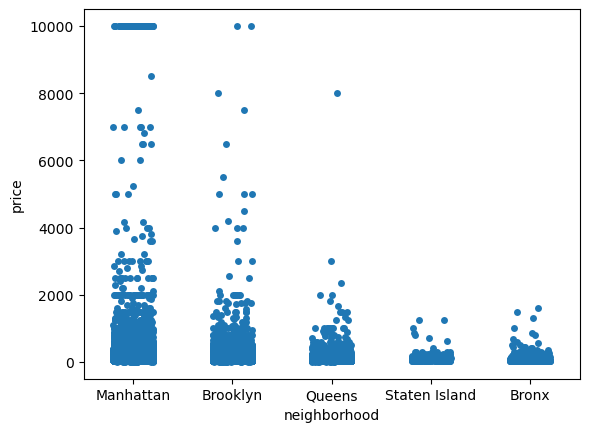

In [18]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
sns.stripplot( x = "neighborhood", y = "price", data = df, jitter = 0.2)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

###### 맨해튼의 가격이 높을 뿐 아니라,  대여 형태 또한 건물 전체에 대한 대여 및 호텔이 많다. 비단 주거 형태의 차이와 가격의 차이 뿐 아니라, 주거형태에 따른 가격분포의 차이도 고려할 수 있다. 



---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

<Axes: xlabel='accommodates', ylabel='count'>

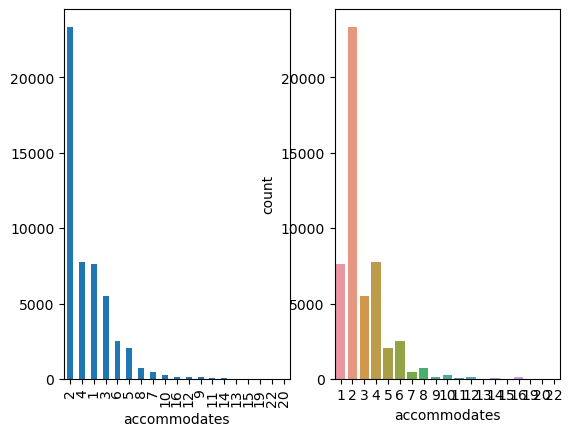

In [19]:
# Q10
# 숫자로도 파악할 수 있지만, 그래프로 보면 더 직관적이에요
f,ax = plt.subplots(1,2)
df["accommodates"].value_counts().plot(kind = "bar", ax = ax[0]) 
sns.countplot(x = "accommodates", data = df, ax = ax[1])# 히스토그램 그리기


- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

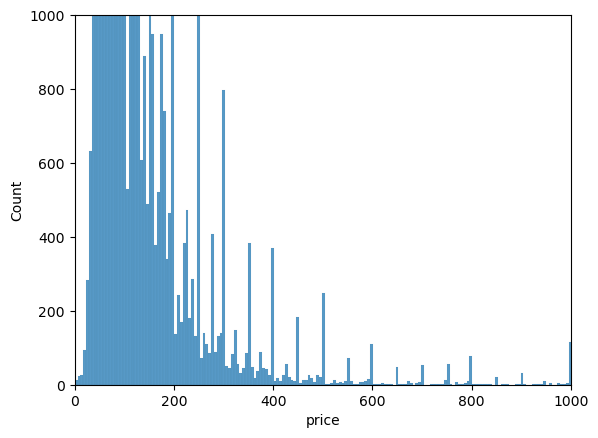

In [20]:
# Q11
sns.histplot(data=df, x='price')
plt.ylim(0, 1000)
plt.xlim(0,1000)
# 그래프 출력
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [21]:
df = pd.read_csv('/Users/jaehyunoh/Desktop/YBIGTA/0713 EDA-FE/airbnb_listings.csv', index_col=0)

/var/folders/st/lt0zbs2n4ng04zk_hnpqlt380000gn/T/ipykernel_96373/1816679608.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jaehyunoh/Desktop/YBIGTA/0713 EDA-FE/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [22]:
df.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [24]:
pd.set_option('display.max_columns', None) 
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


In [25]:
df.replace('$', '',inplace=True)

In [26]:
df= df.apply(pd.to_numeric, errors='coerce')

In [27]:
#Q12
for i in df.columns:
    if df[i].isnull().sum() >= 0.25 :
        df.drop(columns=i, inplace=True)
    elif df[i].isnull().sum() < 0.1:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        df[i].dropna(axis=0, inplace=True)

In [28]:
df

,id,latitude,longitude,accommodates,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm
0,2060,40.857220,-73.937900,2,100,1,1,730,30,60,90,365,1,0
1,2595,40.753620,-73.983770,2,225,1,7,1125,4,34,64,339,48,5
2,3831,40.685140,-73.959760,3,89,1,1,730,6,10,13,151,313,69
3,5099,40.747670,-73.975000,2,200,2,3,21,0,0,0,0,78,8
4,5114,40.719100,-73.990400,2,94,1,1,730,30,60,90,109,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,40.814840,-73.946340,2,150,1,5,1125,25,55,85,271,0,0
50792,42890730,40.769807,-73.987225,2,149,1,2,5,23,53,83,83,0,0
50793,42891018,40.736252,-74.002622,2,188,1,3,30,30,60,90,365,0,0
50794,42891637,40.663870,-73.953400,2,1100,1,1,1125,23,28,29,29,0,0


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [29]:
#Q13-1)
#원핫 인코딩을 위해 get_dummies가 아닌 pd.to_numeric을 사용하였습니다.(범주형 변수를 학습시키기 위해)
df= df.apply(pd.to_numeric, errors='coerce')

In [30]:
#Q13-2)
#availablity가 30,60,90,365 간에 다중공선성이 존재하므로 365를 제외한 세 칼럼을 drop하였습니다.
df = df.drop({'availability_30','availability_60','availability_90'}, axis=1)

In [41]:
#Q13-3)
#큰 수를 가지는 변수 칼럼들에 대하여 MinMaxScaling을 통해 모델 안정화
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

# MinMax Scaling
mm_scaler = mm_scaler.fit_transform(df['maximum_nights'].values.reshape(-1,1))
df['maximum_nights'] = mm_scaler


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
